# Logistic regression three ways

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib import figure

%matplotlib inline

In [17]:
df = pd.read_csv('C:\\users\\kim\\downloads\\creditcardfraud\\creditcard.csv')

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:
Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression
If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
del df['Time']

In [20]:
features = df.copy()
del features['Class']

In [21]:
X = features.as_matrix()
Y = df['Class'].as_matrix()

This data is highly unbalanced. To get a more accurate model, we will tell the model ahead of time of the distribution of the labeled data using the class_weight parameter for logistic regression.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LogisticRegression(class_weight={0:.9, 1:.1})
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.9, 1: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [39]:
model.score(X_test, y_test)

0.99882377725501215

In [40]:
model_lasso = LogisticRegression(penalty='l1', class_weight={0:.9, 1:.1})
model_lasso.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.9, 1: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [41]:
model_lasso.score(X_test, y_test)

0.99884133281837018

In [42]:
model_ridge = LogisticRegression(penalty='l2', class_weight={0:.9, 1:.1})
model_ridge.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.9, 1: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [43]:
model_ridge.score(X_test, y_test)

0.99882377725501215

Out of all of the different models, and based only on the accuracy score against the test data, Logistic Regression with Lasso penalty performed the best. 

In [ ]:
Area Under the Precision-Recall Curve (AUPRC)

In [46]:
from sklearn.metrics import roc_curve, auc

In [73]:
y_score = model_ridge.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = []
tpr = []
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

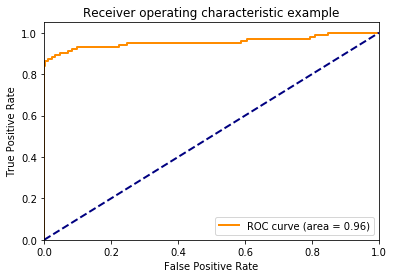

In [74]:
plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()